

## **Step 1: Problem Definition**

### **1. Project Goal**

The goal of this project is to **automatically detect hate speech and offensive language in tweets** using **NLP (Natural Language Processing)** with **TF-IDF feature extraction** and **traditional machine learning algorithms**.

This means that given any tweet text, the model should classify it into **one of three categories**:

1. **Hate Speech** → Tweets with abusive or targeted hate content.
2. **Offensive Language** → Tweets that contain offensive language but may not target a particular group.
3. **Neither** → Normal tweets without hate or offensive content.

---

### **2. Why This Project is Important**

* Social media platforms like **Twitter, Facebook, Instagram** face huge volumes of user-generated content daily.
* **Manual moderation** is impossible at scale.
* Automating hate speech detection helps:

  * Reduce online harassment
  * Improve platform safety
  * Aid in **ethical AI applications**

---

### **3. Type of Problem**

* **Category:** Multi-class text classification (3 classes)
* **Input:** Raw tweet text
* **Output:** Class label (0, 1, or 2 corresponding to Hate, Offensive, or Neither)
* **Challenge:**

  * Text is **short, noisy, and informal** (emojis, slang, hashtags, mentions).
  * Classes may be **imbalanced** (more offensive than hate tweets).
  * Tweets can contain sarcasm, abbreviations, or misspellings.

---

### **4. Tools & Techniques**

* **NLP Techniques:**

  * Text cleaning (punctuation removal, stopwords removal, lemmatization)
  * TF-IDF vectorization
* **Machine Learning Algorithms:**

  * Logistic Regression
  * Support Vector Machine (SVM)
  * Random Forest
  * Multinomial Naive Bayes
* **Evaluation Metrics:**

  * Accuracy, F1-score (macro), Confusion Matrix

---

### **5. Expected Outcome**

* A **machine learning model** that takes a tweet as input and outputs the **predicted class**.
* Ability to **handle unseen tweets** effectively.
* Optionally, a **user-friendly interface** using Streamlit for testing new tweet



## **Step 2: Dataset Collection & Overview**

### **1. Dataset Selection**

We will use the **“Hate Speech and Offensive Language Dataset”** by Davidson et al. (2017).

* **Source:** [Kaggle Link](https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset)
* **Format:** CSV
* **Number of Tweets:** ~24,802
* **Columns:**

  1. `tweet_id` → Unique identifier for each tweet
  2. `class` → Label of the tweet

     * 0 → Hate Speech
     * 1 → Offensive Language
     * 2 → Neither
  3. `tweet_text` → The text content of the tweet

---

### **2. Dataset Structure**

Here’s a **preview** of what the dataset looks like:

| tweet_id   | class | tweet_text                          |
| ---------- | ----- | ----------------------------------- |
| 1234567890 | 0     | “I hate [targeted group]!”          |
| 1234567891 | 1     | “This is so stupid and annoying 😡” |
| 1234567892 | 2     | “Going to the park today! 🌞”       |

* **Short tweets:** Most tweets are < 280 characters
* **Noisy text:** Contains hashtags (#), mentions (@username), emojis, URLs
* **Imbalanced classes:** Usually more offensive tweets than hate speech

---

### **3. How to Download Dataset**

1. Go to the Kaggle link above.
2. Click **Download** → Extract the CSV file.
3. Save it in your project folder, e.g., `hate_speech_dataset.csv`.

---

### **4. Loading Dataset in Python**

Here’s a **sample code snippet** to load the dataset using Pandas:

```python
import pandas as pd

# Load dataset
df = pd.read_csv("hate_speech_dataset.csv")

# Check first 5 rows
print(df.head())

# Check class distribution
print(df['class'].value_counts())
```

✅ **Output:**

* First 5 tweets to understand the data
* Class distribution to see imbalance (important for later ML step)

---

### **5. Things to Note**

* Tweets will require **cleaning** (removing URLs, mentions, punctuation, etc.)
* The dataset is ready for **supervised ML** because it has **features (tweet_text) and labels (class)**
* It’s a **small-to-medium dataset** → fast to train ML models with TF-IDF

---



In [14]:
import pandas as pd

# Load dataset
df = pd.read_csv("dataset.csv")

# Check first 5 rows
print(df.head())

# Check class distribution
print(df['class'].value_counts())


   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
class
1    19190
2     4163
0     1430
Name: count, dtype: int64


In [15]:
# Check basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB
None


In [16]:
print(df.isnull().sum())


Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64


In [17]:
df = df.dropna(subset=['tweet', 'class'])


class
1    19190
2     4163
0     1430
Name: count, dtype: int64


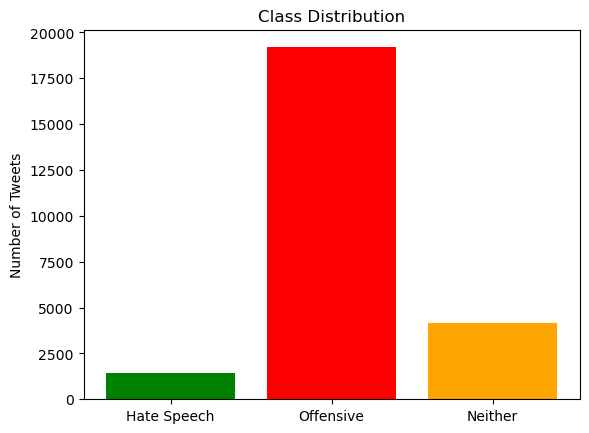

In [18]:
class_counts = df['class'].value_counts()
print(class_counts)

# Optional: visualize
import matplotlib.pyplot as plt

plt.bar(class_counts.index, class_counts.values, color=['red','orange','green'])
plt.xticks([0,1,2], ['Hate Speech','Offensive','Neither'])
plt.ylabel('Number of Tweets')
plt.title('Class Distribution')
plt.show()


count    24783.000000
mean        85.436065
std         41.548238
min          5.000000
25%         52.000000
50%         81.000000
75%        119.000000
max        754.000000
Name: tweet_length, dtype: float64


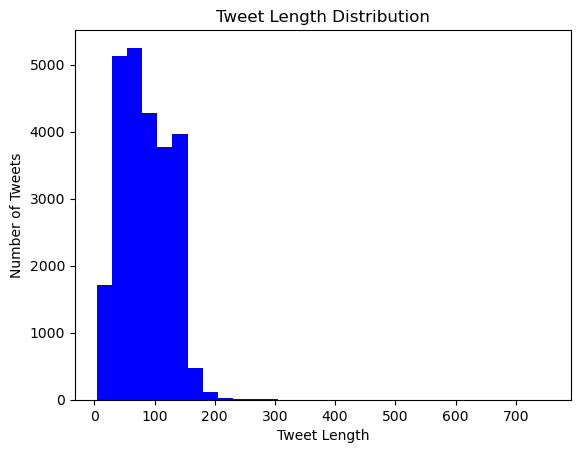

In [19]:
# Create a new column for tweet length
df['tweet_length'] = df['tweet'].apply(len)

# Summary statistics
print(df['tweet_length'].describe())

# Visualization
plt.hist(df['tweet_length'], bins=30, color='blue')
plt.xlabel('Tweet Length')
plt.ylabel('Number of Tweets')
plt.title('Tweet Length Distribution')
plt.show()


In [20]:
from collections import Counter
import re

# Function to get top words
def get_top_words(df_class, n=10):
    words = ' '.join(df_class['tweet']).lower()
    words = re.sub(r'[^a-z\s]', '', words)  # remove punctuation
    word_list = words.split()
    return Counter(word_list).most_common(n)

# Top words for Hate Speech
print("Top words in Hate Speech:", get_top_words(df[df['class']==0]))
# Top words for Offensive
print("Top words in Offensive:", get_top_words(df[df['class']==1]))
# Top words for Neither
print("Top words in Neither:", get_top_words(df[df['class']==2]))


Top words in Hate Speech: [('a', 548), ('you', 435), ('the', 388), ('i', 349), ('rt', 326), ('to', 324), ('and', 233), ('bitch', 209), ('is', 205), ('faggot', 190)]
Top words in Offensive: [('bitch', 8014), ('a', 7579), ('i', 6124), ('rt', 5974), ('you', 5108), ('the', 4882), ('to', 3986), ('bitches', 3027), ('my', 3003), ('that', 2928)]
Top words in Neither: [('the', 1908), ('a', 1361), ('rt', 1312), ('i', 1057), ('to', 1029), ('and', 872), ('in', 732), ('trash', 686), ('of', 686), ('is', 663)]


In [21]:
# Count retweets
retweets = df['tweet'].str.startswith('RT @').sum()
print(f"Number of retweets: {retweets}")

# Count mentions
mentions = df['tweet'].str.contains('@').sum()
print(f"Number of tweets with mentions: {mentions}")


Number of retweets: 6467
Number of tweets with mentions: 14226


In [22]:
# Count tweets with emojis / punctuation
special_chars = df['tweet'].str.contains(r'[!@#$%^&*(),.?":{}|<>]').sum()
print(f"Tweets with special characters: {special_chars}")


Tweets with special characters: 21775


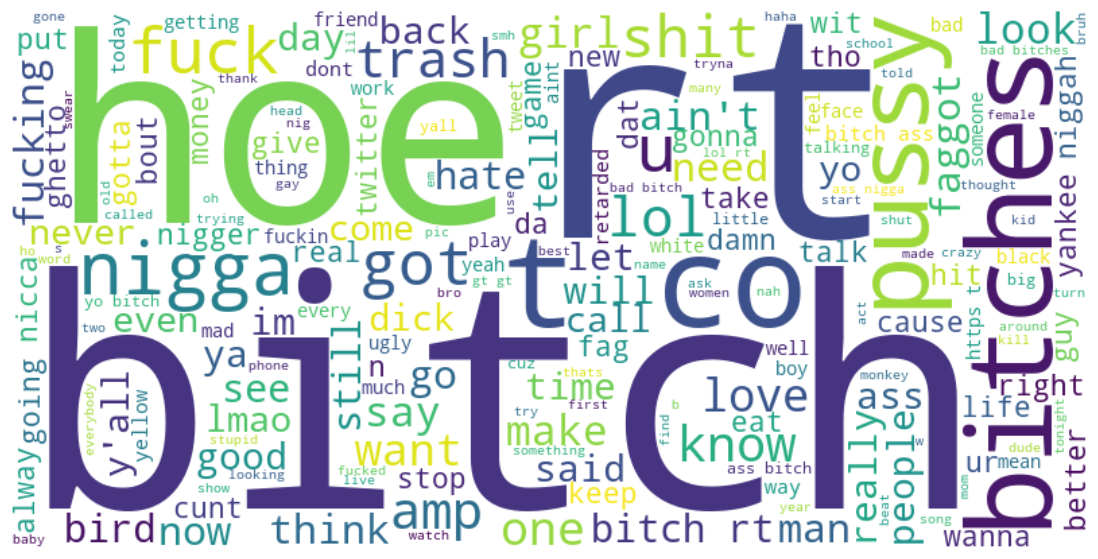

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word cloud for all tweets
text = ' '.join(df['tweet']).lower()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [24]:
df['clean_tweet'] = df['tweet'].str.lower()


In [25]:
import re

df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'@\w+', '', x))


In [26]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))


In [27]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'\brt\b', '', x))


In [28]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))


In [29]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

df['clean_tweet'] = df['clean_tweet'].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sidhant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: [word for word in x if word not in stop_words])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sidhant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sidhant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join(x))


In [33]:
df['clean_tweet'].head()

0    woman shouldnt complain cleaning house amp man...
1     boy dat coldtyga dwn bad cuffin dat hoe st place
2         dawg ever fuck bitch start cry confused shit
3                                     look like tranny
4       shit hear might true might faker bitch told ya
Name: clean_tweet, dtype: object

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # limit vocab to top 5000 words


In [35]:
# Apply TF-IDF on clean tweets
X = tfidf.fit_transform(df['clean_tweet'])

# Labels
y = df['class']


In [36]:
print(X.shape)  


(24783, 5000)


In [37]:
print(tfidf.get_feature_names_out()[:50])  # first 50 words


['aa' 'aap' 'ab' 'ability' 'able' 'abo' 'abortion' 'absolute' 'absolutely'
 'abt' 'abu' 'abuse' 'abusive' 'accent' 'accept' 'acceptable' 'accident'
 'accidentally' 'according' 'account' 'accurate' 'ace' 'acid'
 'acknowledge' 'acl' 'across' 'act' 'actin' 'acting' 'action' 'active'
 'activity' 'actor' 'actress' 'actual' 'actually' 'ad' 'adam' 'add'
 'added' 'addicted' 'address' 'admit' 'admits' 'adopted' 'adorable'
 'adult' 'advice' 'ae' 'af']


In [43]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression with balanced dataset
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_log, target_names=['Hate Speech','Offensive','Neither']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Logistic Regression Report:

              precision    recall  f1-score   support

 Hate Speech       0.89      0.95      0.92      3838
   Offensive       0.94      0.85      0.89      3838
     Neither       0.94      0.98      0.96      3838

    accuracy                           0.92     11514
   macro avg       0.92      0.92      0.92     11514
weighted avg       0.92      0.92      0.92     11514

Confusion Matrix:
 [[3634  152   52]
 [ 385 3249  204]
 [  47   47 3744]]


In [45]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naive Bayes Report:\n")
print(classification_report(y_test, y_pred_nb, target_names=['Hate Speech','Offensive','Neither']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes Report:

              precision    recall  f1-score   support

 Hate Speech       0.82      0.88      0.85      3838
   Offensive       0.83      0.80      0.82      3838
     Neither       0.92      0.88      0.90      3838

    accuracy                           0.85     11514
   macro avg       0.86      0.85      0.85     11514
weighted avg       0.86      0.85      0.85     11514

Confusion Matrix:
 [[3367  399   72]
 [ 536 3080  222]
 [ 226  224 3388]]


In [46]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Report:\n")
print(classification_report(y_test, y_pred_svm, target_names=['Hate Speech','Offensive','Neither']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Report:

              precision    recall  f1-score   support

 Hate Speech       0.90      0.96      0.93      3838
   Offensive       0.95      0.85      0.89      3838
     Neither       0.94      0.97      0.96      3838

    accuracy                           0.93     11514
   macro avg       0.93      0.93      0.93     11514
weighted avg       0.93      0.93      0.93     11514

Confusion Matrix:
 [[3697  123   18]
 [ 385 3249  204]
 [  34   65 3739]]


In [47]:
import joblib

# Save the TF-IDF vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

# Save the best model (example: Logistic Regression)
joblib.dump(log_reg, "best_model.pkl")


['best_model.pkl']